In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [3]:
def generate_data(num, p):
    # Fix the seed to reproduce the results
    rand = np.random.RandomState()
    x =[]
    for i in range(num):
        p_generate = np.random.uniform(0,1,1)
        if p_generate<p:
            num_rand = np.random.exponential(1, 1)
            num_rand = np.clip(num_rand, 0, 1)
            x.append(num_rand)
        else:
            num_rand = 1 - np.random.exponential(0.1, 1)
            num_rand = np.clip(num_rand, 0, 1)
            x.append(num_rand)
    x = np.array(x).reshape(-1,)
    y = 1/2 + 1/4 * np.sin(2. * np.pi* x)
    noise = np.random.normal(0, 0.1, num)
    y = np.clip(y+noise, 0, 1)
    return x, y

In [11]:
num = int(1e2)
p = 0.1
x_train, y_train = generate_data(num, p)

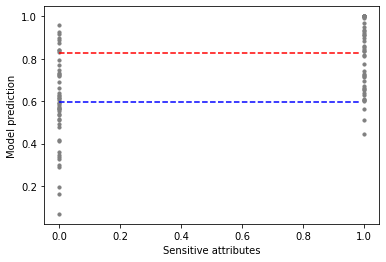

In [13]:
x_train_2 = np.random.randint(0, 2, len(x_train))
index_0 = np.where(x_train_2 == 0)
index_1 = np.where(x_train_2 == 1)

y_train[index_1] = np.clip(y_train[index_1]+0.3, 0, 1)

plt.figure()
plt.scatter(x_train_2, y_train, c='grey', s=10)
plt.xlabel('Sensitive attributes')
plt.ylabel('Model prediction')
x = np.arange(0, 1, 1e-2)

y_mean_0 = (np.mean(y_train[index_0])) * np.ones_like(x)
y_mean_1 = (np.mean(y_train[index_1])) * np.ones_like(x)
plt.plot(x, y_mean_0, c='blue', linestyle='--')
plt.plot(x, y_mean_1, c='red', linestyle='--')
plt.savefig("binary_dp.pdf")
# plt.title('Histogram')
# fig.subplots_adjust(wspace=.3)
plt.show()

In [14]:
num = int(1e4)
p = 0.1
x_train, y_train = generate_data(num, p)

Text(0, 0.5, 'Model prediction')

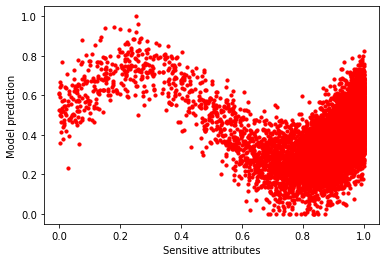

In [15]:
plt.figure()
plt.scatter(x_train, y_train, c='red', s=10)
plt.xlabel('Sensitive attributes')
plt.ylabel('Model prediction')
# plt.title('Scatte')

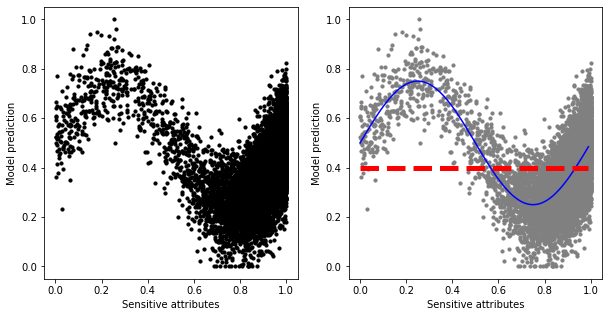

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plt.subplot(121)
plt.scatter(x_train, y_train, c='black', s=10)
plt.xlabel('Sensitive attributes')
plt.ylabel('Model prediction')
plt.subplot(122)
plt.scatter(x_train, y_train, c='grey', s=10)
plt.xlabel('Sensitive attributes')
plt.ylabel('Model prediction')
x = np.arange(0, 1, 1e-2)
y = 1/2 + 1/4 * np.sin(2. * np.pi* x)
y_mean = (np.mean(y)-0.1) * np.ones_like(y)
plt.plot(x, y, c='blue')
plt.plot(x, y_mean, c='red', linestyle='--', linewidth=5)
plt.savefig("cont_dp.pdf", dpi=150)
# plt.title('Histogram')
# fig.subplots_adjust(wspace=.3)
plt.show()

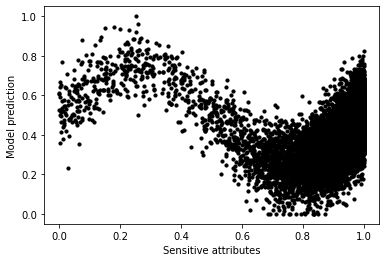

In [28]:
plt.figure()
plt.scatter(x_train, y_train, c='black', s=10)
plt.xlabel('Sensitive attributes')
plt.ylabel('Model prediction')
plt.savefig("cont_dp1.pdf", dpi=150)

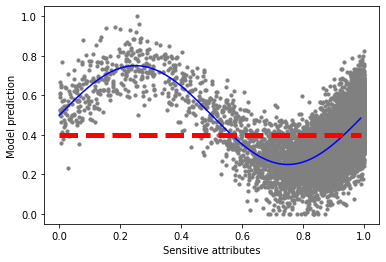

In [29]:
plt.figure()
plt.scatter(x_train, y_train, c='grey', s=10)
plt.xlabel('Sensitive attributes')
plt.ylabel('Model prediction')
x = np.arange(0, 1, 1e-2)
y = 1/2 + 1/4 * np.sin(2. * np.pi* x)
y_mean = (np.mean(y)-0.1) * np.ones_like(y)
plt.plot(x, y, c='blue')
plt.plot(x, y_mean, c='red', linestyle='--', linewidth=5)
plt.savefig("cont_dp2.pdf", dpi=150)
# plt.title('Histogram')
# fig.subplots_adjust(wspace=.3)
plt.show()

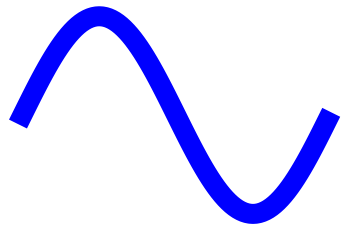

In [26]:
x = np.arange(0, 1, 1e-2)
y = np.sin(2*np.pi*x)
fig = plt.figure()
plt.axis('off')
plt.plot(x, y, c='blue', linewidth=20)
plt.savefig('sinx.pdf')
plt.show()

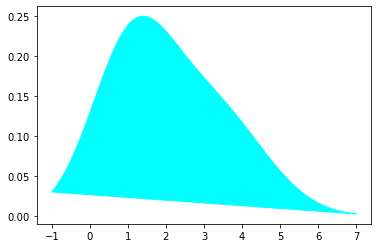

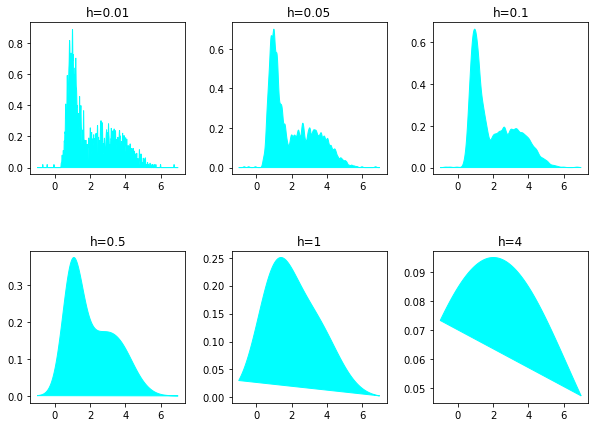

GridSearchCV(cv=None, error_score=nan,
             estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0,
                                     breadth_first=True, kernel='gaussian',
                                     leaf_size=40, metric='euclidean',
                                     metric_params=None, rtol=0),
             iid='deprecated', n_jobs=None,
             param_grid={'bandwidth': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 ,
       1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65,
       1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

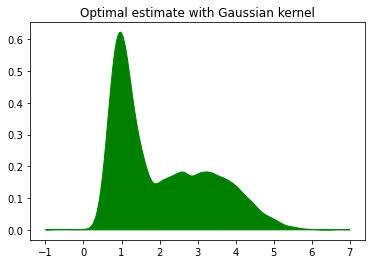

optimal bandwidth: 0.15
